In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-indonesia/covid_19_indonesia_time_series_all.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('/kaggle/input/covid19-indonesia/covid_19_indonesia_time_series_all.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [5]:
df.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [6]:
# Use only rows where Location Level = "Country" (Indonesia summary)
df = df[df['Location Level'] == 'Country']

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Fill missing values with 0
df.fillna(0, inplace=True)

# Select relevant numeric columns
cols = ['Date', 'New Cases', 'New Deaths', 'New Recovered', 'Total Cases',
        'Total Deaths', 'Total Recovered', 'Total Active Cases']
df = df[cols]
df.tail()

,Date,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered,Total Active Cases
31690,2022-09-12,1848,17,3465,6394340,157787,6204241,32312
31725,2022-09-13,2896,20,3617,6397236,157807,6207858,31571
31760,2022-09-14,2799,21,3938,6400035,157828,6211796,30411
31794,2022-09-15,2651,21,3915,6402686,157849,6215711,29126
31821,2022-09-16,2358,27,2997,6405044,157876,6218708,28460


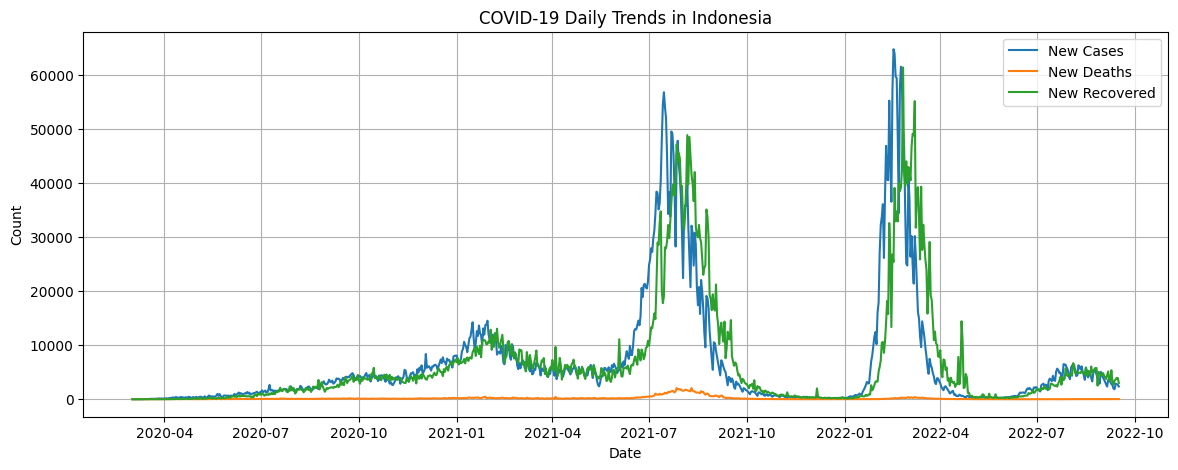

In [7]:
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['New Cases'], label='New Cases')
plt.plot(df['Date'], df['New Deaths'], label='New Deaths')
plt.plot(df['Date'], df['New Recovered'], label='New Recovered')
plt.legend()
plt.title('COVID-19 Daily Trends in Indonesia')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

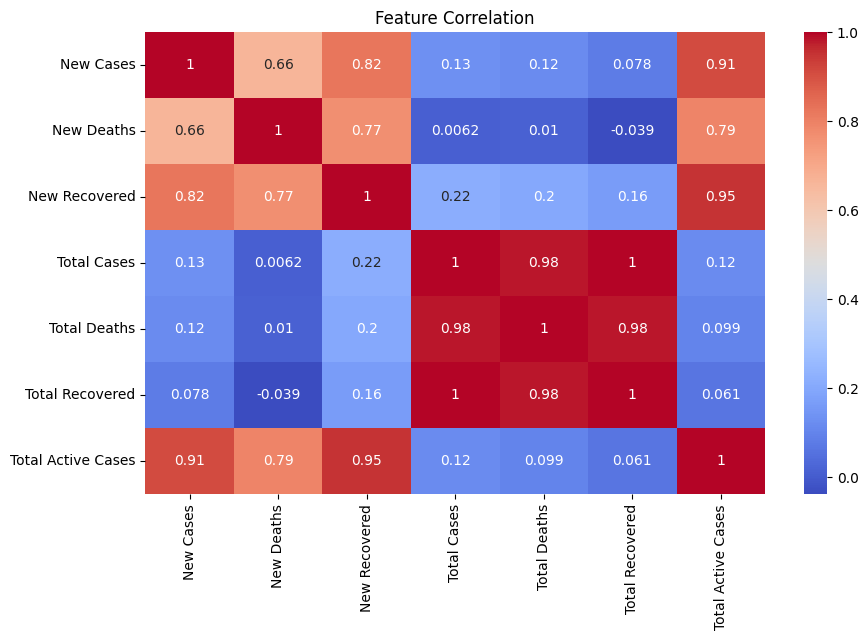

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns='Date').corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [9]:
# Create features and target
X = df[['New Deaths', 'New Recovered', 'Total Deaths', 'Total Recovered', 'Total Active Cases']]
y = df['New Cases']

In [10]:
# Split train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.9353212758453395
MSE: 10951401.114417473


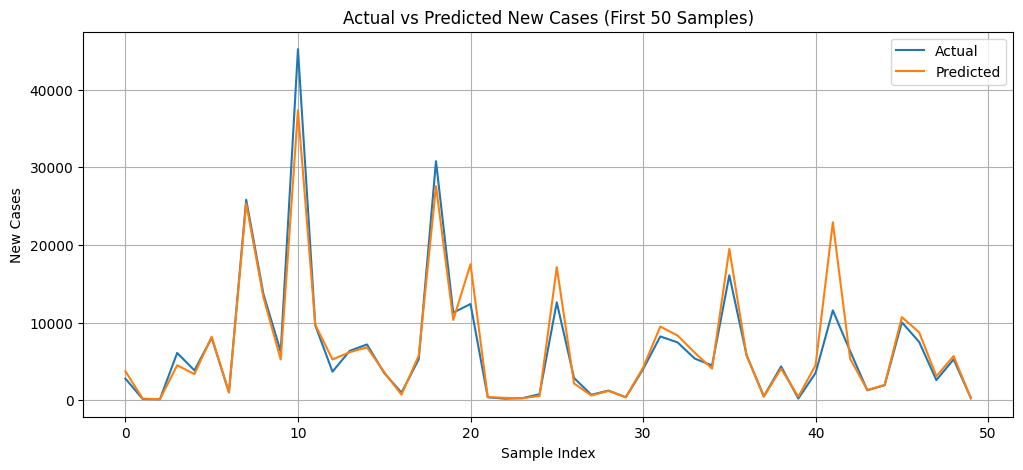

In [13]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.title('Actual vs Predicted New Cases (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()